## Optimization & Training

- tf와 layers 패키지 불러오기

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets

In [ ]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

- Basic CNN

In [3]:
inputs = layers.Input((28, 28, 1))
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)  # num_classes
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

### Optimization
- Loss Function
- Optimization
- Metrics

### Loss Function

#### 이진분류 : Binary   다중분류 : Categorical

In [4]:
loss = 'binary_crossentropy'
loss = 'categorical_crossentropy'

In [5]:
tf.keras.losses.binary_crossentropy

<function tensorflow.python.keras.losses.binary_crossentropy>

In [6]:
tf.keras.losses.categorical_crossentropy

<function tensorflow.python.keras.losses.categorical_crossentropy>

In [7]:
loss_fun = tf.keras.losses.sparse_categorical_crossentropy

#### One Hot 인코딩이 되지 않았을때 : Sparse

In [8]:
tf.keras.losses.sparse_categorical_crossentropy

<function tensorflow.python.keras.losses.sparse_categorical_crossentropy>

In [9]:
sparse_loss_func = tf.keras.losses.sparse_categorical_crossentropy

### Metrics
- 모델을 평가하는 방법
- accuracy를 이름으로 넣는 방법

In [10]:
metrics = ['accuracy']

- tf.keras.metrics

In [11]:
tf.keras.metrics.Accuracy()
tf.keras.metrics.Precision()
tf.keras.metrics.Recall()

In [12]:
metrics = [tf.keras.metrics.Accuracy()]

### Compile
- optimizer 적용 : 'sgd', 'rmsprop', 'adam'
- sgd : tf.keras.optimizers.SGD()
- rmsprop : tf.keras.optimizers.RMSprop()
- adam : tf.keras.optimizers.Adam()

In [13]:
optm = tf.keras.optimizers.Adam()

- optimizer = tf.keras.optimizers.Adam()
- loss = tf.keras.losses.sparse_categorical_crossentropy
- metrics = tf.keras.metrics.Accuracy()

In [14]:
model.compile(optimizer=optm, loss=sparse_loss_func, metrics=metrics)

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

---

### Prepare Dataset

In [16]:
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [17]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [18]:
test_x.shape, test_y.shape

((10000, 28, 28), (10000,))

입력하는 데이터가 4차원이어야하는데 현재는 train_x의 차원이 3차원 임을 확인해 볼 수 있음

차원 수 늘리기

In [19]:
import numpy as np

- np.expand_dims( ) 활용

In [20]:
np.expand_dims(train_x, -1).shape

(60000, 28, 28, 1)

- tf.expand_dims( ) 활용

In [21]:
tf.expand_dims(train_x, -1).shape

TensorShape([60000, 28, 28, 1])

- tf.newaxis 활용

In [22]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

기존 (60000, 28, 28) -> (60000, 28, 28, 1) 로 변경된 것을 확인할 수 있음

In [23]:
train_x.shape

(60000, 28, 28, 1)

### Rescaling

In [24]:
np.min(train_x), np.max(train_x)

(0, 255)

최저의 값이 0, 최대의 값이 255이므로 모든 데이터를 0과 1 사이의 데이터로 바꾸기위해 255로 나누어줌

In [25]:
train_x = train_x / 255.
test_x = test_x / 255.

In [26]:
np.min(train_x), np.max(train_x)

(0.0, 1.0)

---

### tf.data 사용

In [27]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))

In [28]:
train_ds = train_ds.shuffle(1000) # 1000은 버퍼 사이즈
train_ds = train_ds.batch(32) # iteration 할 때 마다 설정한 batch_size만큼씩 나옴

In [30]:
test_ds = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_ds = test_ds.batch(32)

### 시각화 해보기

- matplotlib을 불러와서 데이터 시각화 하기

In [31]:
import matplotlib.pyplot as plt

- train_ds.take( n ) : 몇(n) 개의 step 만큼 가져올 것인지 설정

- 설정해주지 않으면 데이터의 끝까지 무한정으로 가져옴

- 전체 데이터 셋에서 2개만 가져옴

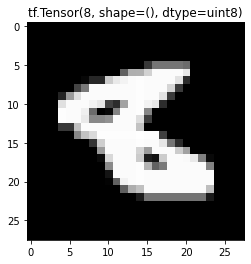

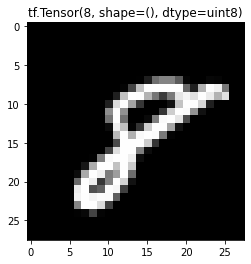

In [42]:
for image, label in train_ds.take(2):
    # print(label[0], type(label[0]))
    plt.title(str(label[0]))
    # plt.title(label[0])
    plt.imshow(image[0, :, :, 0], 'gray')
    plt.show()

- 하나만 가져오고 싶은 경우

[ 32, 28, 28, 1 ] -> [ Batch_size=32, image_size=(28, 28), tf.newaxis로 늘린 차원 =1]

In [43]:
image, label = next(iter(train_ds))
image.shape, label.shape

(TensorShape([32, 28, 28, 1]), TensorShape([32]))

### Training (Keras)

- Keras를 활용하여 학습할 때는 기존과 같지만 train_ds는 generator라서 그대로 넣을 수 있음

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.fit(train_x, train_y, batch_size=32, epochs=10)
-> model.fit(train_ds, epochs=10)

In [45]:
model.fit(train_ds, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1471 - sparse_categorical_accuracy: 0.9538
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0585 - sparse_categorical_accuracy: 0.9823
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0444 - sparse_categorical_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0370 - sparse_categorical_accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0332 - sparse_categorical_accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0300 - sparse_categorical_accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0261 - sparse_categorical_accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0242 - sparse_categorical_accuracy: 0.9932
Epoch 9/10
1875/1875 [==

### Optimization
- Loss Function
- Optimizer

In [46]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

- Loss Function을 담을 곳
- Metrics

In [47]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### Trainig

- @tf.fucntion = 기존 session 열었던 것처럼 바로 작동하지 않고 그래프만 만들고 학습이 시작되면 돌아가도록 함

- tf.GradientTape()

In [53]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images) # 예측 
        loss = loss_object(labels, predictions) # loss를 구하고
    gradients = tape.gradient(loss, model.trainable_variables) # 기울기를 얻고
    optimizer.apply_gradients(zip(gradients, model.trainable_variables)) # optimizer를 통해 model에 업데이트

    train_loss(loss) # loss는 잘 떨어지고 있는지
    train_accuracy(labels, predictions) # 정확도는 어떻게 되고 있는지 확인

In [54]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

- 한 epoch마다 학습, 테스트 반복되도록 함

In [56]:
for epoch in range(2): # 두 번의 epoch
    # 학습
    for images, labels in train_ds: # train_ds에서 iteration하게 데이터 생성
        train_step(images, labels)

    # 테스트
    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    template = "Epoch {}, Loss : {}, Accuracy : {}, Test Loss : {}, Test Accuracy : {}"

    print(template.format(epoch+1, 
                          train_loss.result(), 
                          train_accuracy.result()*100, 
                          test_loss.result(), 
                          test_accuracy.result() * 100))

Epoch 1, Loss : 0.009921038523316383, Accuracy : 99.71666717529297, Test Loss : 0.03110472857952118, Test Accuracy : 99.16999816894531
Epoch 2, Loss : 0.009329255670309067, Accuracy : 99.72721862792969, Test Loss : 0.0433468259871006, Test Accuracy : 99.06999969482422
